In [27]:
import pandas as pd
import numpy as np
import datetime
import requests
import warnings

import matplotlib.pyplot as plt
import matplotlib
import matplotlib.dates as mdates
import seaborn as sns
import plotly.offline as py
import plotly_express as px


from IPython.display import Image
warnings.filterwarnings('ignore')
%matplotlib inline

india_covid_19 = pd.read_csv('Data_visu/case_time_series.csv')
hospital_beds = pd.read_csv('Data_visu/HospitalBedsIndia.csv')
ICMR_details = pd.read_csv('Data_visu/tested_numbers_icmr_data.csv')
icmr_labs_statewise = pd.read_csv('Data_visu/icmr_labs_statewise.csv')
state_testing = pd.read_csv('Data_visu/statewise_tested_numbers_data.csv')
state_cases=pd.read_csv('Data_visu/states (2).csv')



In [29]:
df1 = india_covid_19
df1["Active"]=df1["Total Confirmed"]-df1["Total Recovered"]
print(df1["Active"])

df1.head()



0           1
1           1
2           1
3           2
4           3
        ...  
636    624410
637    625528
638    626194
639    624462
640    624217
Name: Active, Length: 641, dtype: int64


,Date,Date_YMD,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased,Active
0,30 January 2020,2020-01-30,1,1,0,0,0,0,1
1,31 January 2020,2020-01-31,0,1,0,0,0,0,1
2,1 February 2020,2020-02-01,0,1,0,0,0,0,1
3,2 February 2020,2020-02-02,1,2,0,0,0,0,2
4,3 February 2020,2020-02-03,1,3,0,0,0,0,3


In [31]:
hospital_beds.head()

,Sno,State/UT,NumPrimaryHealthCenters_HMIS,NumCommunityHealthCenters_HMIS,NumSubDistrictHospitals_HMIS,NumDistrictHospitals_HMIS,TotalPublicHealthFacilities_HMIS,NumPublicBeds_HMIS,NumRuralHospitals_NHP18,NumRuralBeds_NHP18,NumUrbanHospitals_NHP18,NumUrbanBeds_NHP18
0,1,Andaman & Nicobar Islands,27,4,NaN,3,34,1246,27,575,3,500
1,2,Andhra Pradesh,1417,198,31.0,20,1666,60799,193,6480,65,16658
2,3,Arunachal Pradesh,122,62,NaN,15,199,2320,208,2136,10,268
3,4,Assam,1007,166,14.0,33,1220,19115,1176,10944,50,6198
4,5,Bihar,2007,63,33.0,43,2146,17796,930,6083,103,5936


In [33]:
ICMR_details.head()

,Update Time Stamp,Tested As Of,Daily RTPCR Samples Collected_ICMR Application,Total RTPCR Samples Collected_ICMR Application,Total Samples Tested,Total Individuals Tested,Total Positive Cases,Tests conducted by Private Labs,Positive cases from samples reported,Sample Reported today,...,Total Sessions Conducted,Total Doses Provided to States/UTs,Total Vaccine Consumption Including Wastage,Total Doses Available with States/UTs,Total Doses Available with States/UTs & Private Hospitals,Total Doses In Pipeline,Source,Source 2,Source 3,Source 4
0,13/03/2020 00:00:00,13/03/2020,NaN,NaN,6500.0,5900.0,78,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Press_Release_ICMR_13March2020.pdf,NaN,NaN,NaN
1,18/03/2020 18:00:00,18/03/2020,NaN,NaN,13125.0,12235.0,150,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ICMR_website_update_18March_6PM_IST.pdf,NaN,NaN,NaN
2,19/03/2020 10:00:00,19/03/2020,NaN,NaN,13316.0,12426.0,168,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ICMR_website_update_19March_10AM_IST_V2.pdf,NaN,NaN,NaN
3,19/03/2020 18:00:00,19/03/2020,NaN,NaN,14175.0,13285.0,182,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ICMR_website_update_19March_6PM_IST.pdf,NaN,NaN,NaN
4,20/03/2020 10:00:00,20/03/2020,NaN,NaN,14376.0,13486.0,206,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ICMR_website_update_20March_10AM_IST.pdf,NaN,NaN,NaN


In [35]:
icmr_labs_statewise.head()

,Unnamed: 0,Unnamed: 1,Andaman and Nicobar Islands,Unnamed: 3,Andhra Pradesh,Unnamed: 5,Arunachal Pradesh,Unnamed: 7,Assam,Unnamed: 9,...,West Bengal,Unnamed: 73,Mobile Vans,Unnamed: 75,Duplicates,Unnamed: 77,Total,Unnamed: 79,Changes,Unnamed: 81
0,NaN,NaN,Govt,Private,Govt,Private,Govt,Private,Govt,Private,...,Govt,Private,Govt,Private,Govt,Private,Govt,Private,Govt,Private
1,04/05/2020,RT-PCR,1,0,10,0,1,0,7,0,...,10,4,0,0,NaN,NaN,263,101,-,-
2,NaN,TrueNat,1,0,38,0,0,0,0,0,...,0,0,0,0,NaN,NaN,44,0,-,-
3,NaN,CBNAAT,1,0,0,0,0,0,0,0,...,1,2,0,0,NaN,NaN,13,13,-,-
4,11/05/2020,RT-PCR,1,0,10,0,1,0,7,0,...,11,7,0,0,-1,NaN,278,119,15,18


In [37]:
state_testing.head()

,Updated On,State,"RT-PCR Test(Includes TrueNat,CBNAAT,CRISPR)",RAT(Rapid Antigen Test),Other Tests,Total Tested,Tag (Total Tested),Positive,Negative,Unconfirmed,...,Male(Confirmed Cases),Female(Confirmed Cases),Transgender(Confirmed Cases),Unknown(Confirmed Cases),Male(Deceased Cases),Female(Deceased Cases),Transgender(Deceased Cases),Unknown(Deceased Cases),Source1,Source2
0,17/04/2020,Andaman and Nicobar Islands,NaN,NaN,NaN,1403.0,Samples Sent,12,1210,181,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://t.me/indiacovid/2550,https://dhs.andaman.gov.in/
1,24/04/2020,Andaman and Nicobar Islands,NaN,NaN,NaN,2679.0,Samples Sent,27,NaN,246,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://t.me/indiacovid/3147?single,NaN
2,27/04/2020,Andaman and Nicobar Islands,NaN,NaN,NaN,2848.0,Samples Sent,33,NaN,106,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://t.me/indiacovid/3365?single,NaN
3,01/05/2020,Andaman and Nicobar Islands,NaN,NaN,NaN,3754.0,Samples Sent,33,NaN,199,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://t.me/indiacovid/3781,NaN
4,16/05/2020,Andaman and Nicobar Islands,NaN,NaN,NaN,6677.0,Samples Sent,33,NaN,136,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://t.me/indiacovid/4925,NaN


In [39]:
state_cases.head(100)

,Date,State,Confirmed,Recovered,Deceased,Other,Tested
0,2020-01-30,Kerala,1,0,0,0,NaN
1,2020-01-30,India,1,0,0,0,NaN
2,2020-02-02,Kerala,2,0,0,0,NaN
3,2020-02-02,India,2,0,0,0,NaN
4,2020-02-03,Kerala,3,0,0,0,NaN
...,...,...,...,...,...,...,...
95,2020-03-12,Andhra Pradesh,1,0,0,0,NaN
96,2020-03-12,Delhi,6,0,0,0,NaN
97,2020-03-12,Haryana,14,0,0,0,NaN
98,2020-03-12,Jammu and Kashmir,1,0,0,0,NaN


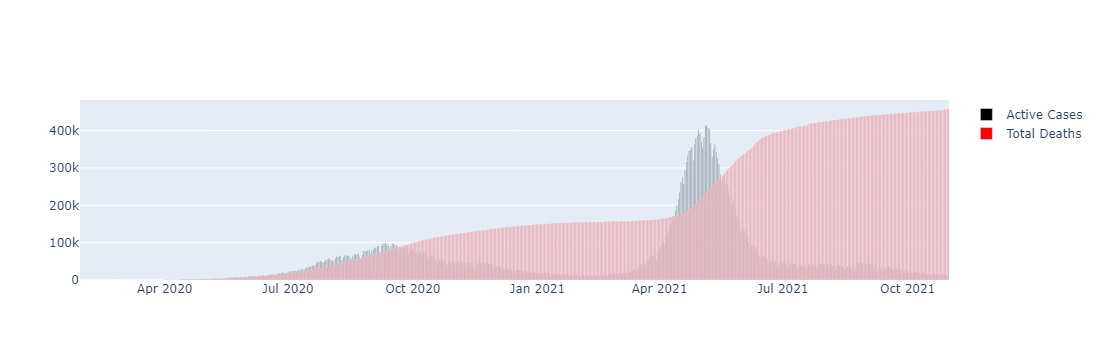

In [41]:
import plotly.graph_objects as go
fig=go.Figure([go.Bar(name = 'Active Cases',x=df1["Date_YMD"],y=df1["Daily Confirmed"],marker_color='Black'),go.Bar(name = 'Total Deaths',x=df1["Date_YMD"],y=df1["Total Deceased"],marker_color='Red')])
                
##fig.update_layout(title=col, xaxis_title="Time frame", yaxis_title="Active cases")
fig.show()

In [45]:

dfstate = state_cases.groupby('State')[['Confirmed', 'Recovered', 'Deceased']].max().reset_index()
dfstate["Mortality Rate"] = (dfstate["Deceased"] / dfstate['Confirmed']) * 100
df = dfstate.sort_values('Confirmed', ascending=False).head(10)

dfstate.drop([13],axis=0, inplace=True)



print(df)


             State  Confirmed  Recovered  Deceased  Mortality Rate
13           India   34285612   33661339    458470        1.337208
21     Maharashtra    6611078    6450585    140216        2.120925
17          Kerala    4968657    4857181     31681        0.637617
16       Karnataka    2988333    2941578     38082        1.274356
32      Tamil Nadu    2702623    2655015     36116        1.336331
1   Andhra Pradesh    2066450    2047722     14373        0.695541
35   Uttar Pradesh    1710158    1687151     22900        1.339058
37     West Bengal    1592908    1565471     19141        1.201639
8            Delhi    1439870    1414431     25091        1.742588
26          Odisha    1041457    1029147      8386        0.805218


In [47]:
def plot_topn_states(col,  n):
    df = dfstate.sort_values(col, ascending=False).head(n)
    fig = px.bar(df, x=col, y='State',color='State', text=col, 
                 orientation='h', 
                 color_discrete_sequence=px.colors.qualitative.Dark2)
    fig.update_layout(title=col, xaxis_title="", yaxis_title="", 
                      yaxis_categoryorder = 'total ascending',
                      showlegend=False)
    fig.show()

    

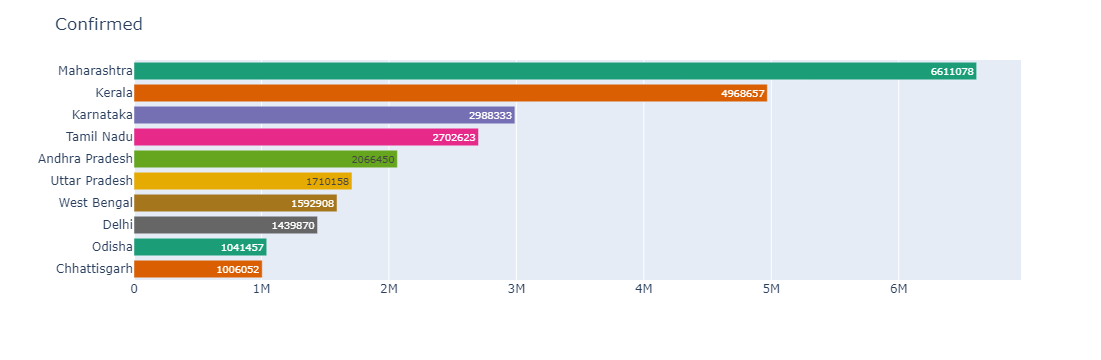

In [49]:

plot_topn_states('Confirmed',  10)

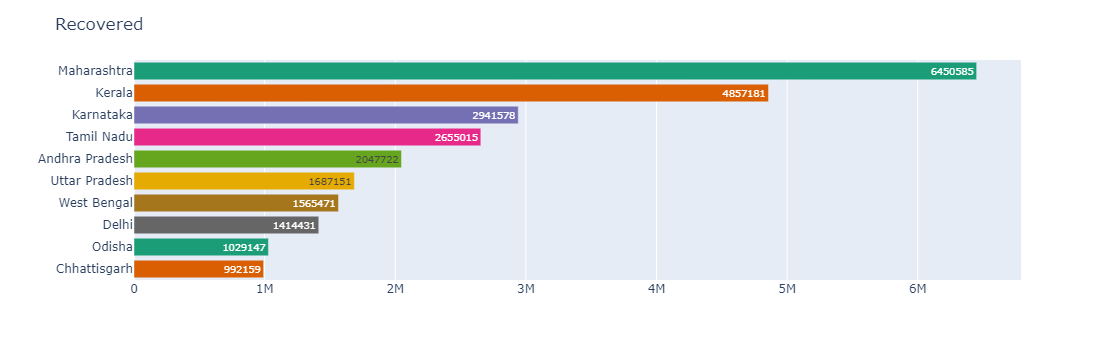

In [51]:
plot_topn_states('Recovered',  10)

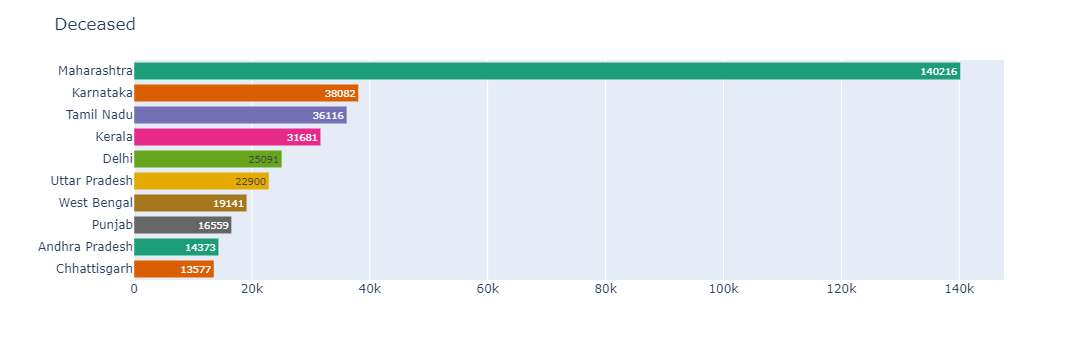

In [53]:
plot_topn_states('Deceased',  10)

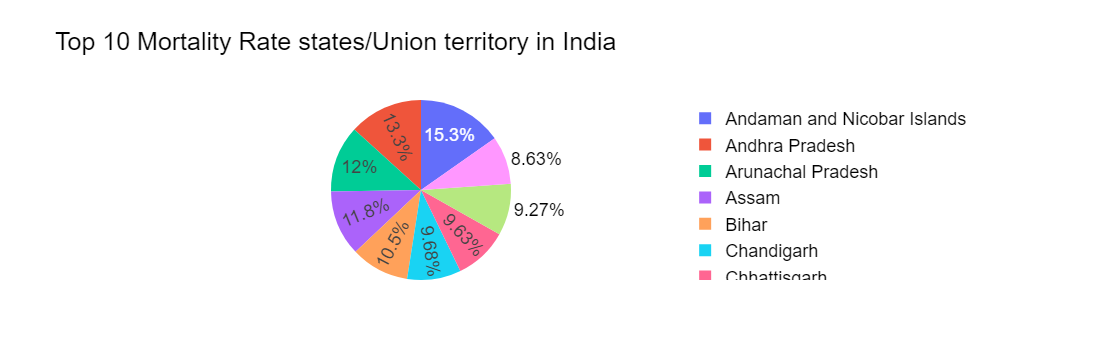

In [55]:
df = dfstate.sort_values('Mortality Rate', ascending=False).head(10)

df.drop([0],axis=0, inplace=True)
label=dfstate['State'].tolist()
fig = go.Figure(data=[go.Pie(labels=label,values=np.array(df["Mortality Rate"]))])
fig.update_layout(
    title="Top 10 Mortality Rate states/Union territory in India",
    font=dict(
        family="Arial",
        size=18,
        color="Black"
    )
)
fig.show()

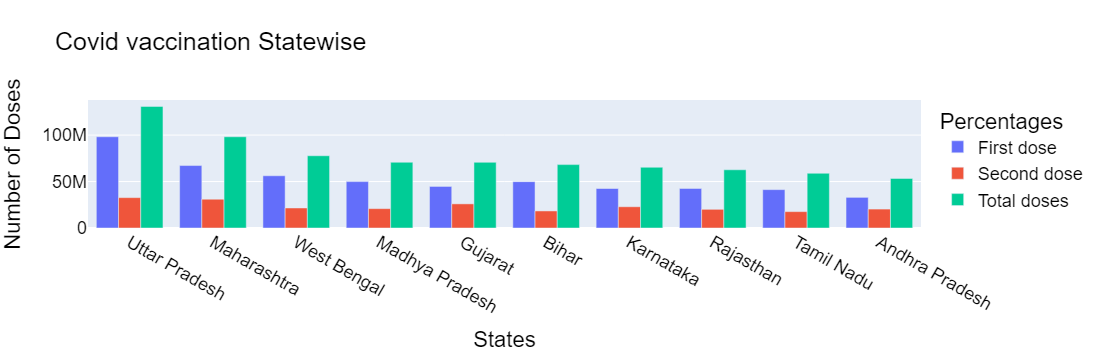

In [59]:
df=pd.read_csv("Data_visu/vaccine_doses_statewise_v2.csv")
df = df.groupby('State')[['First Dose Administered', 'Second Dose Administered', 'Total Doses Administered']].max().reset_index()
df.drop([33],axis=0, inplace=True)
df.drop([0],axis=0, inplace=True)
df.drop([7],axis=0, inplace=True)



df = df.sort_values('Total Doses Administered', ascending=False).head(10)



fig=go.Figure([go.Bar(name = 'First dose ',x=df["State"],y=df["First Dose Administered"]),go.Bar(name = 'Second dose',x=df["State"],y=df["Second Dose Administered"]),go.Bar(name = 'Total doses',x=df["State"],y=df["Total Doses Administered"])])
fig.update_layout(
    title="Covid vaccination Statewise",
    xaxis_title="States",
    yaxis_title="Number of Doses",
    legend_title="Percentages",
    font=dict(
        family="Arial",
        size=18,
        color="Black"
    )
)
fig.show()

In [63]:
df=pd.read_csv("Data_visu/vaccine_doses_statewise_v2.csv")
df = df.groupby('State')[['First Dose Administered', 'Second Dose Administered', 'Total Doses Administered']].max().reset_index()
df.drop([33],axis=0, inplace=True)
df.drop([0],axis=0, inplace=True)
df.drop([7],axis=0, inplace=True)

  Vaccinated As of  First Dose Administered  Second Dose Administered  \
0       01/02/2021                  7900312                         0   
1       01/03/2021                 24512674                   5195598   
2       01/04/2021                118297596                  19280680   
3       01/05/2021                256342306                  57289756   
4       01/06/2021                346822992                  90270342   

   Total Doses Administered  
0                   7900312  
1                  29708272  
2                 137578276  
3                 313632062  
4                 437093334  
  Vaccinated As of  First Dose Administered  Second Dose Administered  \
0       01/02/2021                  7900312                         0   
1       01/03/2021                 24512674                   5195598   
2       01/04/2021                118297596                  19280680   
3       01/05/2021                256342306                  57289756   
4       01/06/20

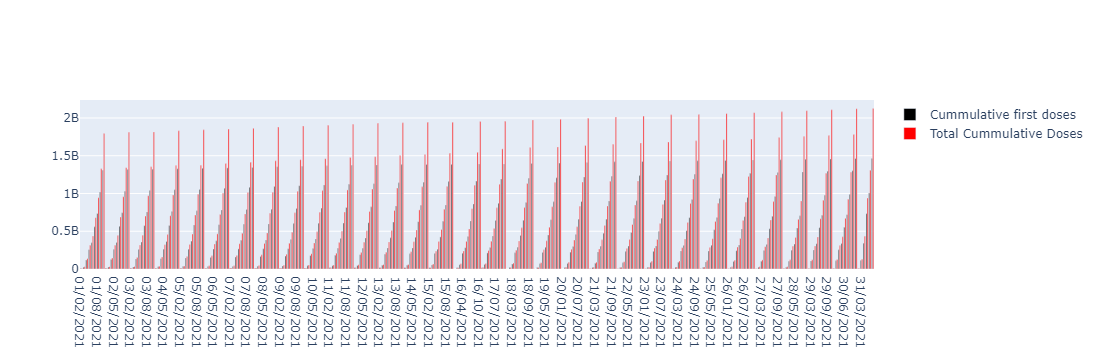

In [67]:
df1=pd.read_csv("Data_visu/vaccine_doses_statewise_v2.csv")
df1 = df1.groupby('Vaccinated As of')[['First Dose Administered', 'Second Dose Administered', 'Total Doses Administered']].sum().reset_index()

# Print the first few rows of the dataframe
print(df1.head())

# Create the bar chart
print(df1.head())
import plotly.graph_objects as go
fig=go.Figure([go.Bar(name = 'Cummulative first doses',x=df1["Vaccinated As of"],y=df1["First Dose Administered"],marker_color='Black'),go.Bar(name = 'Total Cummulative Doses',x=df1["Vaccinated As of"],y=df1["Total Doses Administered"],marker_color='Red')])
                
##fig.update_layout(title=col, xaxis_title="Time frame", yaxis_title="Total Cummunlative doses ")
fig.show()